# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[0:10])

['albany', 'attawapiskat', 'punta arenas', 'deniliquin', 'severo-kurilsk', 'hobart', 'port hardy', 'mount isa', 'ushuaia', 'coahuayana']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
len(cities)

616

In [3]:
# API URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [18]:
# Create empty lists to append data retirieved from API 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop counter and batch
counter = 1
batch = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    if counter == 60 :
        time.sleep(60)
        counter += 1
        batch += 1
        response = requests.get(query_url).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter}  of batch {batch} | {city_record}")
    else:
        # Try statement to append calls where value is found 
        # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
        try: 
            response = requests.get(query_url).json() 
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            print(f"Processing Record {counter}  of batch {batch} | {city_record}")

            counter += 1

        # If no record found "skip" to next call
        except:
            print("City not found. Skipping...")
        continue

Beginning Data Retrieval
-------------------------------
Processing Record 1  of batch 1 | Albany
City not found. Skipping...
Processing Record 2  of batch 1 | Punta Arenas
Processing Record 3  of batch 1 | Deniliquin
Processing Record 4  of batch 1 | Severo-Kurilsk
Processing Record 5  of batch 1 | Hobart
Processing Record 6  of batch 1 | Port Hardy
Processing Record 7  of batch 1 | Mount Isa
Processing Record 8  of batch 1 | Ushuaia
Processing Record 9  of batch 1 | Coahuayana
Processing Record 10  of batch 1 | Kapaa
Processing Record 11  of batch 1 | Qaanaaq
Processing Record 12  of batch 1 | Khatanga
Processing Record 13  of batch 1 | Egvekinot
Processing Record 14  of batch 1 | Labuhan
Processing Record 15  of batch 1 | Arraial do Cabo
Processing Record 16  of batch 1 | Mataura
Processing Record 17  of batch 1 | Hokitika
City not found. Skipping...
Processing Record 18  of batch 1 | East London
Processing Record 19  of batch 1 | Bluff
Processing Record 20  of batch 1 | Agirish
Cit

Processing Record 174  of batch 2 | Sept-Iles
Processing Record 175  of batch 2 | Lorengau
Processing Record 176  of batch 2 | Ivanivka
Processing Record 177  of batch 2 | Ipixuna
Processing Record 178  of batch 2 | Airai
Processing Record 179  of batch 2 | Mogzon
Processing Record 180  of batch 2 | Pecos
Processing Record 181  of batch 2 | Carroll
Processing Record 182  of batch 2 | Inhambane
Processing Record 183  of batch 2 | Sao Filipe
Processing Record 184  of batch 2 | Ca Mau
Processing Record 185  of batch 2 | Narsaq
City not found. Skipping...
Processing Record 186  of batch 2 | Puerto Narino
Processing Record 187  of batch 2 | Isabela
Processing Record 188  of batch 2 | Lavrentiya
Processing Record 189  of batch 2 | Broome
Processing Record 190  of batch 2 | Cidreira
Processing Record 191  of batch 2 | Senigallia
Processing Record 192  of batch 2 | Sasvad
Processing Record 193  of batch 2 | Podor
Processing Record 194  of batch 2 | Jonava
City not found. Skipping...
City not f

Processing Record 346  of batch 2 | Mizdah
Processing Record 347  of batch 2 | Karasburg
Processing Record 348  of batch 2 | Njombe
Processing Record 349  of batch 2 | Awjilah
Processing Record 350  of batch 2 | Fukue
Processing Record 351  of batch 2 | Hailar
City not found. Skipping...
Processing Record 352  of batch 2 | Saint-Louis
Processing Record 353  of batch 2 | Ust-Nera
Processing Record 354  of batch 2 | Caldwell
Processing Record 355  of batch 2 | Myitkyina
Processing Record 356  of batch 2 | Beni
Processing Record 357  of batch 2 | Nome
Processing Record 358  of batch 2 | Srandakan
Processing Record 359  of batch 2 | Dinagat
Processing Record 360  of batch 2 | Raja Sansi
Processing Record 361  of batch 2 | Kambove
Processing Record 362  of batch 2 | Ilulissat
City not found. Skipping...
Processing Record 363  of batch 2 | Meulaboh
Processing Record 364  of batch 2 | Sydney Mines
Processing Record 365  of batch 2 | Quatre Cocos
Processing Record 366  of batch 2 | Port Moresb

Processing Record 514  of batch 2 | Athabasca
Processing Record 515  of batch 2 | Dzaoudzi
Processing Record 516  of batch 2 | Sungaipenuh
Processing Record 517  of batch 2 | Kavaratti
Processing Record 518  of batch 2 | Jerantut
Processing Record 519  of batch 2 | Am Timan
Processing Record 520  of batch 2 | High Prairie
Processing Record 521  of batch 2 | Maba
Processing Record 522  of batch 2 | Dubbo
Processing Record 523  of batch 2 | Nanortalik
Processing Record 524  of batch 2 | Acari
Processing Record 525  of batch 2 | Yazd
Processing Record 526  of batch 2 | Le Vauclin
Processing Record 527  of batch 2 | Vianopolis
City not found. Skipping...
Processing Record 528  of batch 2 | Kajaani
Processing Record 529  of batch 2 | Greenfield
Processing Record 530  of batch 2 | Lons-le-Saunier
Processing Record 531  of batch 2 | Saint-Augustin
Processing Record 532  of batch 2 | Shihezi
Processing Record 533  of batch 2 | Alyangula
Processing Record 534  of batch 2 | Chhabra
Processing Re

In [20]:
with open('extracted_data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["City", "Cloudiness", "Country","Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
    writer.writerows(zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# File to Load (Remember to Change These)
file_to_load = "extracted_data.csv"

# Read Purchasing File and store into Pandas data frame
weather_data = pd.read_csv(file_to_load)

In [29]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 9 columns):
City          557 non-null object
Cloudiness    557 non-null int64
Country       553 non-null object
Date          557 non-null int64
Humidity      557 non-null int64
Lat           557 non-null float64
Lng           557 non-null float64
Max Temp      557 non-null float64
Wind Speed    557 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.2+ KB


In [30]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,90,US,1559498579,82,42.65,-73.75,75.99,8.05
1,Punta Arenas,75,CL,1559498253,93,-53.16,-70.91,41.00,10.29
2,Deniliquin,8,AU,1559498380,91,-35.53,144.96,44.01,11.01
3,Severo-Kurilsk,100,RU,1559498270,97,50.68,156.12,42.31,8.43
4,Hobart,90,AU,1559498176,70,-42.88,147.33,48.20,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

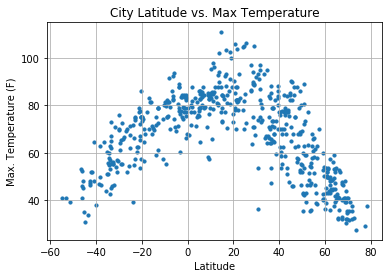

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_temp.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

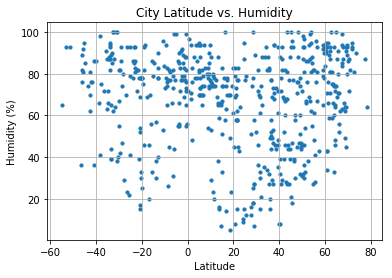

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_hum.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

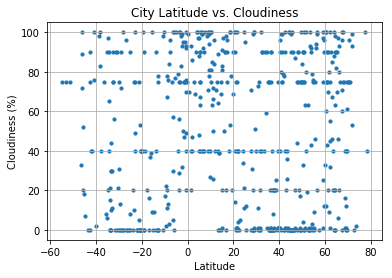

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_cloud.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

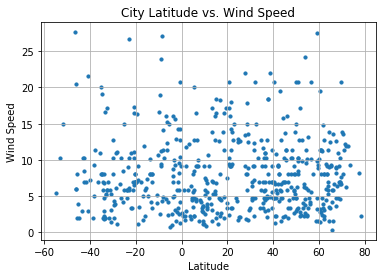

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_wind.png')

# Show plot
plt.show()